In [2]:
import yfinance as yf
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = yf.download("VALE3.SA", start = "2010-01-01", end = "2025-01-01")

[*********************100%%**********************]  1 of 1 completed


In [4]:
df["media_movel"] = df["Close"].rolling(window = 20).mean()
df["desvio_padrao"] = df["Close"].rolling(window = 20).std()
df["banda_superior"] = df["media_movel"] + (2 * df["desvio_padrao"])
df["banda_inferior"] = df["media_movel"] - (2 * df["desvio_padrao"])

In [5]:
df["sinal_compra"] = (df["Close"] < df["banda_inferior"]).astype(int)
df["sinal_venda"] = (df["Close"] > df["banda_superior"]).astype(int)


In [6]:
df["posicao"] = 0

In [7]:
for linha in range(1, len(df)):

    if df["sinal_compra"].iloc[linha] ==1:

        df["posicao"].iloc[linha] = 1
    
    elif df["sinal_venda"].iloc[linha] == 1:

        df["posicao"].iloc[linha] = 0

    else:

        if (df["posicao"].iloc[linha - 1] ==1) and (df["sinal_venda"].iloc[linha] ==0):

            df["posicao"].iloc[linha] = 1

        else:

            df["posicao"].iloc[linha] = 0

In [8]:
df["posicao"] = df["posicao"].shift()

df

,Open,High,Low,Close,Adj Close,Volume,media_movel,desvio_padrao,banda_superior,banda_inferior,sinal_compra,sinal_venda,posicao
Date,,,,,,,,,,,,,
2010-01-04,50.189999,51.490002,49.799999,51.490002,23.631901,2381400,NaN,NaN,NaN,NaN,0,0,NaN
2010-01-05,51.540001,52.540001,51.240002,51.970001,23.852205,3001800,NaN,NaN,NaN,NaN,0,0,0.0
2010-01-06,52.000000,53.369999,51.779999,53.070000,24.357054,2742800,NaN,NaN,NaN,NaN,0,0,0.0
2010-01-07,52.509998,53.540001,52.500000,53.290001,24.458025,2543100,NaN,NaN,NaN,NaN,0,0,0.0
2010-01-08,53.299999,54.240002,53.000000,53.810001,24.696692,2444500,NaN,NaN,NaN,NaN,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,58.180000,58.560001,58.119999,58.169998,58.169998,17444500,60.1700,2.403147,64.976294,55.363705,0,0,1.0
2024-11-26,58.290001,58.490002,57.150002,57.430000,57.430000,21406600,59.9550,2.448165,64.851330,55.058670,0,0,1.0
2024-11-27,57.869999,58.419998,57.599998,58.130001,58.130001,22121200,59.7175,2.378894,64.475287,54.959712,0,0,1.0


In [9]:
df["retorno"] = df["Adj Close"].pct_change()

In [10]:
df["trades"] = (df["posicao"] != df["posicao"].shift()).cumsum() #Soma 1 quando a posição de hoje é diferente de ontem

In [11]:
df["trades"] = df["trades"].where(df["posicao"] == 1)
df

,Open,High,Low,Close,Adj Close,Volume,media_movel,desvio_padrao,banda_superior,banda_inferior,sinal_compra,sinal_venda,posicao,retorno,trades
Date,,,,,,,,,,,,,,,
2010-01-04,50.189999,51.490002,49.799999,51.490002,23.631901,2381400,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2010-01-05,51.540001,52.540001,51.240002,51.970001,23.852205,3001800,NaN,NaN,NaN,NaN,0,0,0.0,0.009322,NaN
2010-01-06,52.000000,53.369999,51.779999,53.070000,24.357054,2742800,NaN,NaN,NaN,NaN,0,0,0.0,0.021166,NaN
2010-01-07,52.509998,53.540001,52.500000,53.290001,24.458025,2543100,NaN,NaN,NaN,NaN,0,0,0.0,0.004145,NaN
2010-01-08,53.299999,54.240002,53.000000,53.810001,24.696692,2444500,NaN,NaN,NaN,NaN,0,0,0.0,0.009758,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,58.180000,58.560001,58.119999,58.169998,58.169998,17444500,60.1700,2.403147,64.976294,55.363705,0,0,1.0,-0.000172,79.0
2024-11-26,58.290001,58.490002,57.150002,57.430000,57.430000,21406600,59.9550,2.448165,64.851330,55.058670,0,0,1.0,-0.012721,79.0
2024-11-27,57.869999,58.419998,57.599998,58.130001,58.130001,22121200,59.7175,2.378894,64.475287,54.959712,0,0,1.0,0.012189,79.0


In [13]:
df = df.dropna(subset = "trades")
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,media_movel,desvio_padrao,banda_superior,banda_inferior,sinal_compra,sinal_venda,posicao,retorno,trades
Date,,,,,,,,,,,,,,,
2024-09-13,58.099998,59.000000,58.029999,58.500000,58.500000,15045100,57.8800,1.105912,60.091825,55.668176,0,0,1.0,0.006711,77.0
2024-09-16,58.430000,58.549999,58.080002,58.500000,58.500000,10548000,57.9560,1.092960,60.141921,55.770080,0,0,1.0,0.000000,77.0
2024-09-17,58.369999,58.549999,57.900002,58.220001,58.220001,12056600,58.0070,1.079542,60.166085,55.847916,0,0,1.0,-0.004786,77.0
2024-09-18,57.590000,58.169998,57.450001,57.540001,57.540001,14429800,57.9690,1.082059,60.133118,55.804883,0,0,1.0,-0.011680,77.0
2024-09-19,58.570000,58.849998,58.169998,58.230000,58.230000,19328400,57.9615,1.079577,60.120655,55.802346,0,0,1.0,0.011992,77.0
2024-09-20,57.709999,58.160000,56.950001,57.349998,57.349998,30842600,57.9590,1.081003,60.121006,55.796994,0,0,1.0,-0.015113,77.0
2024-09-23,57.090000,57.860001,56.599998,57.529999,57.529999,18164700,57.9330,1.084945,60.102891,55.763110,0,0,1.0,0.003139,77.0
2024-09-24,60.209999,60.740002,59.639999,60.340000,60.340000,44910100,57.9600,1.139215,60.238430,55.681570,0,1,1.0,0.048844,77.0
2024-11-12,58.580002,58.590000,57.200001,57.320000,57.320000,26967600,61.1820,1.585230,64.352460,58.011540,1,0,1.0,-0.022677,79.0


<Axes: xlabel='Date'>

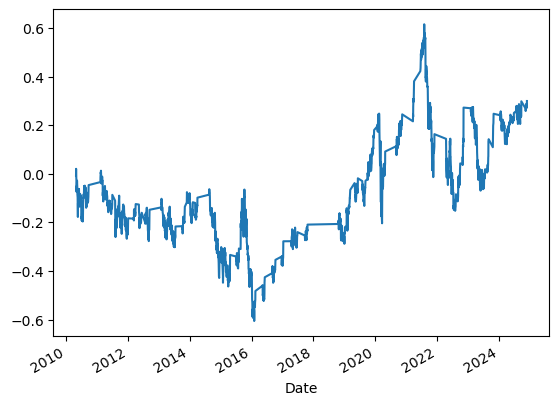

In [14]:
df_retorno_acumulado = (1 + df["retorno"]).cumprod() - 1

df_retorno_acumulado.plot()

In [15]:
df["retorno_cota"] = 1 + df["retorno"]

df["rentabilidade_trades"] = df.groupby("trades")["retorno_cota"].cumprod() - 1

df



,Open,High,Low,Close,Adj Close,Volume,media_movel,desvio_padrao,banda_superior,banda_inferior,sinal_compra,sinal_venda,posicao,retorno,trades,retorno_cota,rentabilidade_trades
Date,,,,,,,,,,,,,,,,,
2010-04-28,53.980000,54.009998,52.009998,52.950001,24.474415,4624700,57.4920,1.837774,61.167549,53.816451,1,0,1.0,-0.006753,3.0,0.993247,-0.006753
2010-04-29,53.599998,54.400002,53.360001,54.400002,25.144623,3476100,57.3395,1.963676,61.266852,53.412148,0,0,1.0,0.027384,3.0,1.027384,0.020446
2010-04-30,54.020000,54.200001,52.750000,53.099998,24.543745,4249900,57.1370,2.181040,61.499081,52.774920,0,0,1.0,-0.023897,3.0,0.976103,-0.003939
2010-05-03,53.270000,53.490002,51.650002,51.700001,23.896646,4100,56.8355,2.489695,61.814891,51.856110,1,0,1.0,-0.026365,3.0,0.973635,-0.030201
2010-05-04,51.150002,51.200001,49.290001,49.360001,22.815054,6558200,56.4250,2.988984,62.402968,50.447033,1,0,1.0,-0.045261,3.0,0.954739,-0.074095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,58.180000,58.560001,58.119999,58.169998,58.169998,17444500,60.1700,2.403147,64.976294,55.363705,0,0,1.0,-0.000172,79.0,0.999828,-0.008184
2024-11-26,58.290001,58.490002,57.150002,57.430000,57.430000,21406600,59.9550,2.448165,64.851330,55.058670,0,0,1.0,-0.012721,79.0,0.987279,-0.020801
2024-11-27,57.869999,58.419998,57.599998,58.130001,58.130001,22121200,59.7175,2.378894,64.475287,54.959712,0,0,1.0,0.012189,79.0,1.012189,-0.008866


In [16]:
df = df.sort_index(ascending = False)
df = df.drop_duplicates("trades") 
df = df.sort_index(ascending = True)
df = df.dropna()
df = df[["trades", "rentabilidade_trades"]]
df

,trades,rentabilidade_trades
Date,,
2010-09-24,3.0,-0.046520
2011-07-01,5.0,-0.041926
2012-01-04,7.0,-0.105825
2012-04-02,9.0,0.071846
2012-06-12,11.0,-0.040842
2012-09-13,13.0,0.014596
2013-04-09,15.0,-0.067028
2013-07-17,17.0,-0.014541
2013-11-04,19.0,0.103500


In [18]:
#Estatisticas

rentabilidade_acumulada = ((1+ df["rentabilidade_trades"]).cumprod()-1).iloc[-1]

trades_certos = (len(df[df["rentabilidade_trades"] > 0])) / len(df["rentabilidade_trades"])
trades_errados = 1 - trades_certos
media_ganhos = df[df["rentabilidade_trades"] > 0]["rentabilidade_trades"].mean()
media_perdas = df[df["rentabilidade_trades"] <= 0]["rentabilidade_trades"].mean()

ev = (trades_certos * media_ganhos) - (trades_errados * abs(media_perdas))

print(f'''
Rentabilidade Acumulada: {rentabilidade_acumulada}
Trades Certos: {trades_certos}
EV: {ev*100}

''')


Rentabilidade Acumulada: 0.2992790375092418
Trades Certos: 0.6153846153846154
EV: 1.4798748111667788


